In [1]:
import sys

import scipy
import torch
import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate, signal
from scipy.interpolate import CubicSpline
from transforms3d.axangles import axangle2mat
from sklearn.preprocessing import StandardScaler

In [2]:
sys.path.append('../')

from spikennet.utils.dataset import DynamicSystem
from spikennet.utils.augmentation import DataGenerator

In [3]:
dg = DataGenerator()

## 1. Low frequency system

In [4]:
def dX_dt(X, t=0):
    a = 1.; b = 0.1
    c = 0.5; d = 0.5
    return np.array([ a*X[0] -   b*X[0]*X[1] ,
                     -c*X[1] + d*b*X[0]*X[1] ])

In [5]:
ds = DynamicSystem(dX_dt)

time = np.linspace(0, 35,  1000)
init_val = np.array([5, 10])

X, infodict = ds.integrate(init_val, time)

print(infodict['message'])

Integration successful.


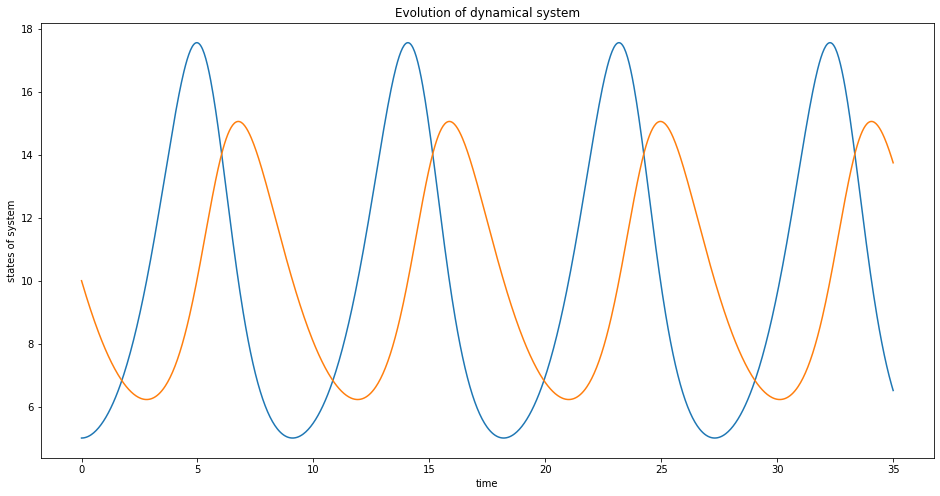

In [6]:
ds.plot(time)

In [7]:
sigma = 0.0085
knot = 20
loc = 0.5

Text(0.5, 0.98, 'Random curves')

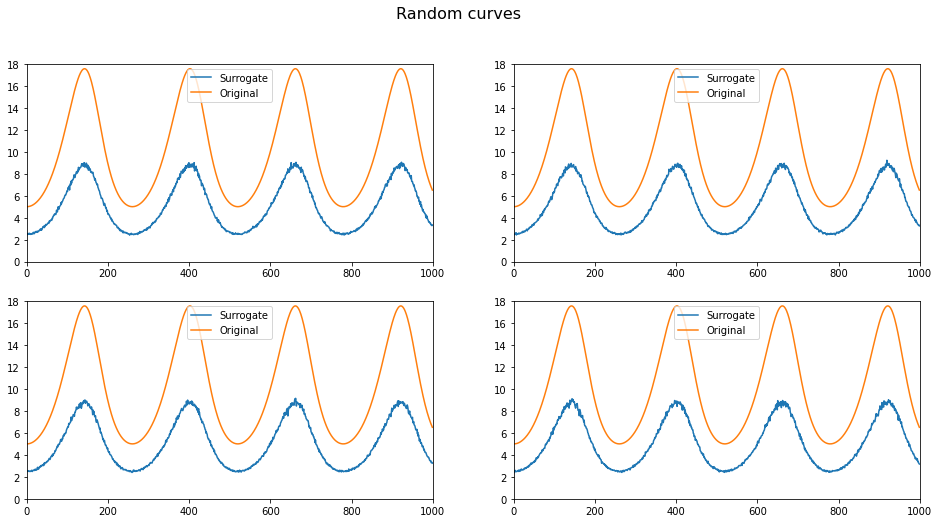

In [8]:
fig = plt.figure(figsize=(16, 8))

for ii in range(4):
    ax = fig.add_subplot(2,2,ii+1)
    ax.plot(X.T[0] * (dg.rand_curve(X, sigma, loc, knot).T[0]))
    ax.plot(X.T[0])
    ax.legend(['Surrogate', 'Original'])
    plt.axis([0, 1000, 0, 18])
    
fig.suptitle('Random curves', fontsize=16)

Text(0.5, 0.98, 'Fast Fourier Transform')

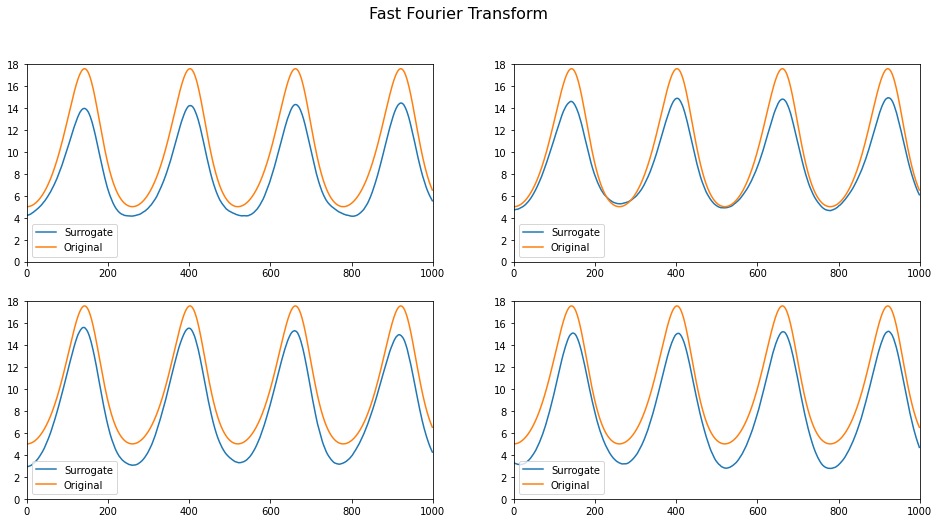

In [9]:
fig = plt.figure(figsize=(16, 8))

for ii in range(4):
    ax = fig.add_subplot(2,2,ii+1)
    ax.plot(0.9*X.T[0] + 0.125*dg.fft(X).T[0])
    ax.plot(X.T[0])
    ax.legend(['Surrogate', 'Original'])
    plt.axis([0, 1000, 0, 18])
    
fig.suptitle('Fast Fourier Transform', fontsize=16)

Text(0.5, 0.98, 'Permutation')

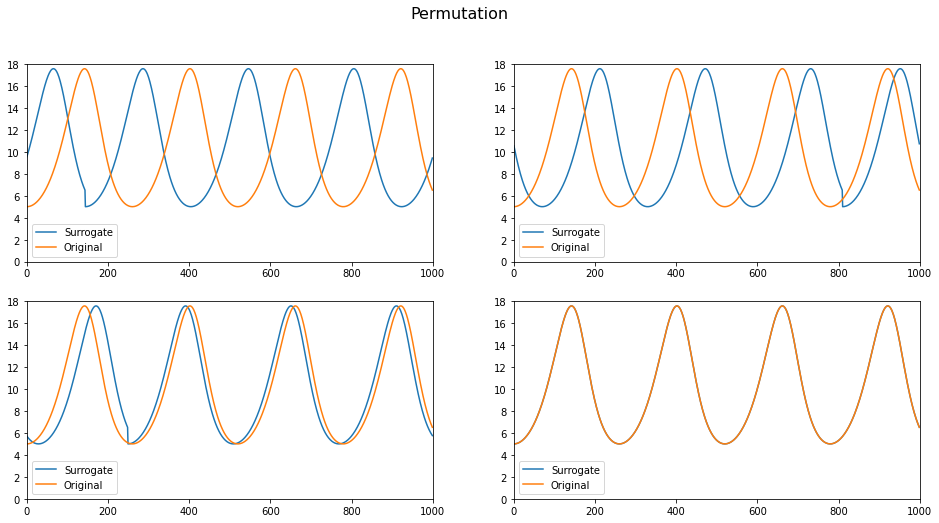

In [10]:
fig = plt.figure(figsize=(16, 8))

for ii in range(4):
    ax = fig.add_subplot(2,2,ii+1)
    ax.plot(dg.permutate(X).T[0])
    ax.plot(X.T[0])
    ax.legend(['Surrogate', 'Original'])
    plt.axis([0, 1000, 0, 18])
    
fig.suptitle('Permutation', fontsize=16)

Text(0.5, 0.98, 'Time inverse')

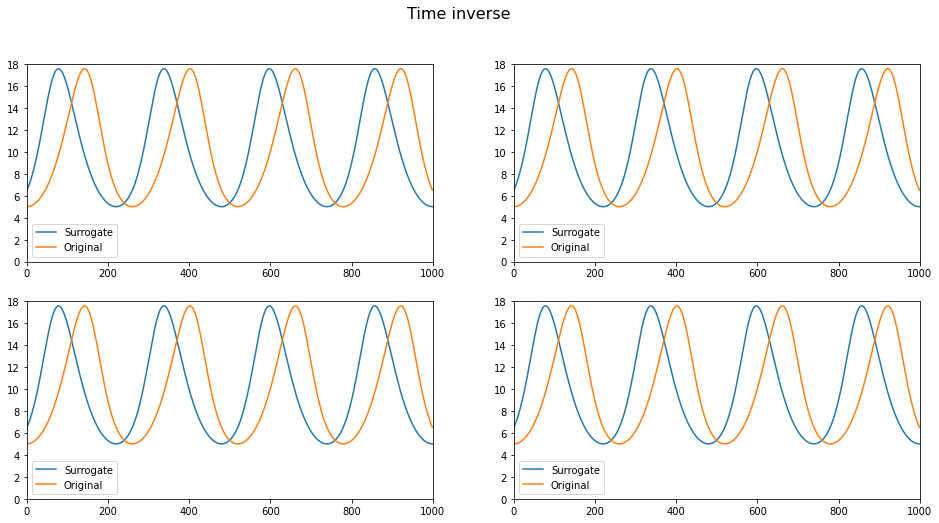

In [11]:
fig = plt.figure(figsize=(16, 8))

for ii in range(4):
    ax = fig.add_subplot(2,2,ii+1)
    ax.plot(dg.time_inverse(X).T[0])
    ax.plot(X.T[0])
    ax.legend(['Surrogate', 'Original'])
    plt.axis([0, 1000, 0, 18])
    
fig.suptitle('Time inverse', fontsize=16)